# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder

# importing dataset

In [2]:
df=pd.read_csv("Training.csv")
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [3]:
df.shape

(4920, 134)

### Observation

The shape of the dataset is (4920,134). i.e,
It has 4920 rows and 134 columns.

# Description of dataset

In [4]:
df.describe(include="all")

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


# Dropping null or NA values 

In [5]:
df.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [6]:
df=df.drop(columns=["Unnamed: 133"])
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [7]:
df.shape

(4920, 133)

In [8]:
df=df.dropna()
df.shape

(4920, 133)

### Observation

The shape of the dataset after dropping NA values is (4920,133). i.e, It has 4920 rows and 133 columns.

# Finding out all the symptoms or features

In [9]:
x=df.columns
x=x[:-1:]
for i in x:
    print(i,end=",  ")

itching,  skin_rash,  nodal_skin_eruptions,  continuous_sneezing,  shivering,  chills,  joint_pain,  stomach_pain,  acidity,  ulcers_on_tongue,  muscle_wasting,  vomiting,  burning_micturition,  spotting_ urination,  fatigue,  weight_gain,  anxiety,  cold_hands_and_feets,  mood_swings,  weight_loss,  restlessness,  lethargy,  patches_in_throat,  irregular_sugar_level,  cough,  high_fever,  sunken_eyes,  breathlessness,  sweating,  dehydration,  indigestion,  headache,  yellowish_skin,  dark_urine,  nausea,  loss_of_appetite,  pain_behind_the_eyes,  back_pain,  constipation,  abdominal_pain,  diarrhoea,  mild_fever,  yellow_urine,  yellowing_of_eyes,  acute_liver_failure,  fluid_overload,  swelling_of_stomach,  swelled_lymph_nodes,  malaise,  blurred_and_distorted_vision,  phlegm,  throat_irritation,  redness_of_eyes,  sinus_pressure,  runny_nose,  congestion,  chest_pain,  weakness_in_limbs,  fast_heart_rate,  pain_during_bowel_movements,  pain_in_anal_region,  bloody_stool,  irritatio

# Finding out different types of prognosis or diseases

In [10]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# Finding the count of each diseasse in the given dataset 

In [11]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

# Finding out standard deviation of all columns 

In [12]:
for i in x:
    print(i,np.std(df[i]),sep="------>   ")

itching------>   0.34469507341236066
skin_rash------>   0.36637970311286006
nodal_skin_eruptions------>   0.14652427605732785
continuous_sneezing------>   0.20757157979274896
shivering------>   0.14652427605732785
chills------>   0.3686297117249971
joint_pain------>   0.3459719774218784
stomach_pain------>   0.20757157979274896
acidity------>   0.20757157979274896
ulcers_on_tongue------>   0.14652427605732785
muscle_wasting------>   0.14652427605732787
vomiting------>   0.48752888533836936
burning_micturition------>   0.20487804878047988
spotting_ urination------>   0.14652427605732785
fatigue------>   0.48834725944358376
weight_gain------>   0.15044550142647423
anxiety------>   0.15044550142647425
cold_hands_and_feets------>   0.15044550142647423
mood_swings------>   0.21022352909039974
weight_loss------>   0.2899875892234619
restlessness------>   0.21022352909039976
lethargy------>   0.28998758922346185
patches_in_throat------>   0.14652427605732787
irregular_sugar_level------>   0.1

###  Observation

The Standard deviation of all the columns are below one. Therefore we can confirm that there are no outliers for the columns in the given Dataset

# Finding out the correlation between the columns

<AxesSubplot:>

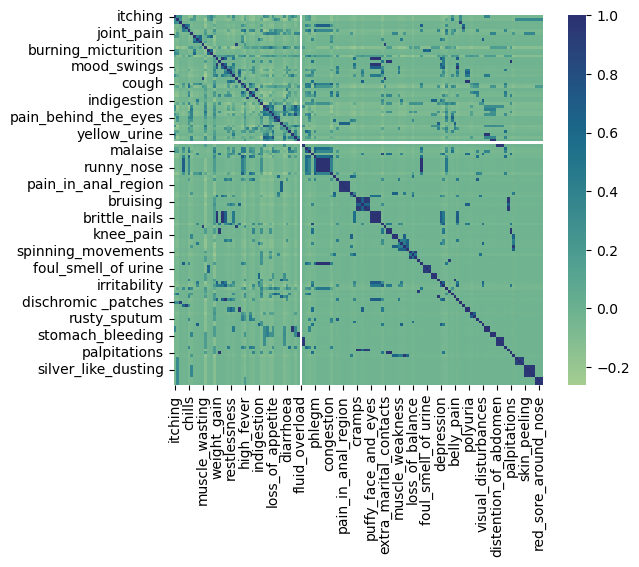

In [13]:
cor=df.corr()
sns.heatmap(cor,square=True,annot=False,cmap="crest")

### Observation

The columns are not evenly correlated. It is not posiible to find out a relation between them

# Finding out unique values for each feature

In [14]:
for i in x:
    print(i,list(df[i].unique()),sep="------>")

itching------>[1, 0]
skin_rash------>[1, 0]
nodal_skin_eruptions------>[1, 0]
continuous_sneezing------>[0, 1]
shivering------>[0, 1]
chills------>[0, 1]
joint_pain------>[0, 1]
stomach_pain------>[0, 1]
acidity------>[0, 1]
ulcers_on_tongue------>[0, 1]
muscle_wasting------>[0, 1]
vomiting------>[0, 1]
burning_micturition------>[0, 1]
spotting_ urination------>[0, 1]
fatigue------>[0, 1]
weight_gain------>[0, 1]
anxiety------>[0, 1]
cold_hands_and_feets------>[0, 1]
mood_swings------>[0, 1]
weight_loss------>[0, 1]
restlessness------>[0, 1]
lethargy------>[0, 1]
patches_in_throat------>[0, 1]
irregular_sugar_level------>[0, 1]
cough------>[0, 1]
high_fever------>[0, 1]
sunken_eyes------>[0, 1]
breathlessness------>[0, 1]
sweating------>[0, 1]
dehydration------>[0, 1]
indigestion------>[0, 1]
headache------>[0, 1]
yellowish_skin------>[0, 1]
dark_urine------>[0, 1]
nausea------>[0, 1]
loss_of_appetite------>[0, 1]
pain_behind_the_eyes------>[0, 1]
back_pain------>[0, 1]
constipation---

In [15]:
print("fluid_overload",df['fluid_overload'].unique(),sep="------->")

fluid_overload------->[0]


### Observation

1) All the columns have binary data i.e, {0,1}. They represent boolean values. \
2) The "fluid_overload" feature has only one unique value. Hence, we can remove the column from the dataset as it is unnecessary.

# Dropping the "fluid_overload" column

In [16]:
df=df.drop(columns=['fluid_overload'])
df.shape

(4920, 132)

### Observation

The shape of the dataset after dropping "fluid_overload"  is (4920,132). i.e, It has 4920 rows and 132 columns.

# Training and Testing dataset

In [17]:
y_train=df.iloc[:,-1]
x_train=df.drop(columns=["prognosis"])
print(x_train.shape)
print(y_train.shape)

(4920, 131)
(4920,)


In [18]:
x_test=pd.read_csv("Testing.csv")
x_test=x_test.dropna()
x_test=x_test.drop(columns=["fluid_overload"])
y_test=x_test.iloc[:,-1]
x_test=x_test.drop(columns=["prognosis"])
print(x_test.shape)
print(y_test.shape)

(42, 131)
(42,)


# Label Encoding y_train and y_test

In [19]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

# Model Building of DesicionTreeClassifier and Evaluation

In [20]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [21]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 1.0


In [22]:
print("r2_score",r2_score(y_test,y_pred))

r2_score 1.0


In [23]:
print("classification_report",classification_report(y_test,y_pred),sep="\n\n")

classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
    

# Model Building of RandomForestClassifier and Evaluation

In [24]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [25]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.9761904761904762


In [26]:
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.9306086202267612


In [27]:
print("classification_report",classification_report(y_test,y_pred),sep="\n\n")

classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         1
    

In [34]:
all=[' itching', ' skin_rash', ' nodal_skin_eruptions', ' continuous_sneezing', ' shivering', ' chills', ' joint_pain', ' stomach_pain', ' acidity', ' ulcers_on_tongue', ' muscle_wasting', ' vomiting', ' burning_micturition', ' spotting_ urination', ' fatigue', ' weight_gain', ' anxiety', ' cold_hands_and_feets', ' mood_swings', ' weight_loss', ' restlessness', ' lethargy', ' patches_in_throat', ' irregular_sugar_level', ' cough', ' high_fever', ' sunken_eyes', ' breathlessness', ' sweating', ' dehydration', ' indigestion', ' headache', ' yellowish_skin', ' dark_urine', ' nausea', ' loss_of_appetite', ' pain_behind_the_eyes', ' back_pain', ' constipation', ' abdominal_pain', ' diarrhoea', ' mild_fever', ' yellow_urine', ' yellowing_of_eyes', ' acute_liver_failure', ' fluid_overload', ' swelling_of_stomach', ' swelled_lymph_nodes', ' malaise', ' blurred_and_distorted_vision', ' phlegm', ' throat_irritation', ' redness_of_eyes', ' sinus_pressure', ' runny_nose', ' congestion', ' chest_pain', ' weakness_in_limbs', ' fast_heart_rate', ' pain_during_bowel_movements', ' pain_in_anal_region', ' bloody_stool', ' irritation_in_anus', ' neck_pain', ' dizziness', ' cramps', ' bruising', ' obesity', ' swollen_legs', ' swollen_blood_vessels', ' puffy_face_and_eyes', ' enlarged_thyroid', ' brittle_nails', ' swollen_extremeties', ' excessive_hunger', ' extra_marital_contacts', ' drying_and_tingling_lips', ' slurred_speech', ' knee_pain', ' hip_joint_pain', ' muscle_weakness', ' stiff_neck', ' swelling_joints', ' movement_stiffness', ' spinning_movements', ' loss_of_balance', ' unsteadiness', ' weakness_of_one_body_side', ' loss_of_smell', ' bladder_discomfort', ' foul_smell_of urine', ' continuous_feel_of_urine', ' passage_of_gases', ' internal_itching', ' toxic_look_(typhos)', ' depression', ' irritability', ' muscle_pain', ' altered_sensorium', ' red_spots_over_body', ' belly_pain', ' abnormal_menstruation', ' dischromic _patches', ' watering_from_eyes', ' increased_appetite', ' polyuria', ' family_history', ' mucoid_sputum', ' rusty_sputum', ' lack_of_concentration', ' visual_disturbances', ' receiving_blood_transfusion', ' receiving_unsterile_injections', ' coma', ' stomach_bleeding', ' distention_of_abdomen', ' history_of_alcohol_consumption', ' blood_in_sputum', ' prominent_veins_on_calf', ' palpitations', ' painful_walking', ' pus_filled_pimples', ' blackheads', ' scurring', ' skin_peeling', ' silver_like_dusting', ' small_dents_in_nails', ' inflammatory_nails', ' blister', ' red_sore_around_nose', ' yellow_crust_ooze']
symptoms=[' itching']
final=[]
for i in all:
    if(i in symptoms):
        final.append(1)
    else:
        final.append(0)
print(final)
predval=dt.predict([final])
dis=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']
print( )

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronchial Asthma


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
